**Feature Engineering Notebook Three: Dimensionality Reduction**  
*Author: Yingxiang Chen, Zihan Yang*

**Reference**
- https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca
- https://sebastianraschka.com/faq/docs/lda-vs-pca.html
- https://en.wikipedia.org/wiki/Linear_discriminant_analysis

# Dimension Reduction

After data preprocessing and feature selection, we have generated a good feature subsets. But sometimes, this subset might still contain too many features and cost so much computing power to train. In this case, we can use dimension reduction techniques to further compress our feature subset. But this might deprecate model performance.

We can also apply dimension reduction methods directly after data preprocessing if we don't have much time on feature selection. We can let the dimension reduction algorithm to compress the original feature space and generate a feature subset for us.

Specifically, we will introduce PCA and LDA (Linear Discriminant Analysis).

## Unsupervised Methods

### PCA (Principal Components Analysis)

PCA is an **unsupervised** technique that finds the directions of maximal variance. It uses a few unrelated features to represent original features in the dataset and tries to retain as much information (variance) as possible. More math detail can be viewed from a [repo](https://github.com/YC-Coder-Chen/Unsupervised-Notes/blob/master/PCA.md) written by us in Github.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 20000 samples as train_set
# the rest samples as test_set
train_set = X[0:20000,]
test_set = X[20000:,]
train_y = y[0:20000]

# we need to standardize the data first or the PCA will only comopress features in
# large scale
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(train_set) 
standardized_train = model.transform(train_set)
standardized_test = model.transform(test_set)

# start compressing
compressor = PCA(n_components=0.9) # set n_components=0.9 =>
# select the number of components such that the amount of variance that needs to be 
# explained is greater than 0.9
# we can also set n_components to the number of features we want

compressor.fit(standardized_train)
transformed_trainset = compressor.transform(standardized_train) # shape: (20000,5)
transformed_testset = compressor.transform(standardized_test)
assert transformed_trainset.shape[1] == transformed_testset.shape[1]

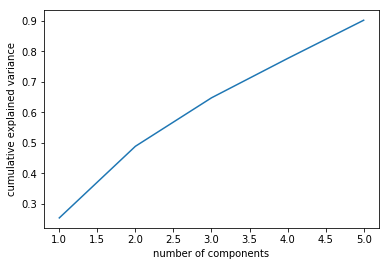

In [2]:
# visualize the relationship between amount of variance explained and number of components
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.array(range(len(compressor.explained_variance_ratio_))) + 1, 
         np.cumsum(compressor.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show(); # two features can already explained much variance

## Supervised Methods

### LDA (Linear Discriminant Analysis)

On the contrary, LDA is a supervised technique attempts to find a feature subset to maximize class linear-separability. It can only be applied to classification problems. LDA assumes that classes are normally distributed and have the same covariance matrix.  
    
Math detail can be accessed at the [offical website](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda) of sklearn. Traditionally, LDA will reduce dimension to (K-1) where K is the number of classes. But in sklearn, it allows further dimension by incorporating PCA into LDA.

In [3]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# classification example
# use iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
# use the first 100 samples as train_set
# the rest 5 samples as test_set
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]
test_y = y[100:,]

# we need to standardize the data because LDA assumes normal distribution
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(train_set) 
standardized_train = model.transform(train_set)
standardized_test = model.transform(test_set)

# start compressing
compressor = LDA(n_components=2) # set n_components=2
# n_components <= min(n_classes - 1, n_features)

compressor.fit(standardized_train, train_y)
transformed_trainset = compressor.transform(standardized_train) # shape: (100,2)
transformed_testset = compressor.transform(standardized_test)
assert transformed_trainset.shape[1] == transformed_testset.shape[1]

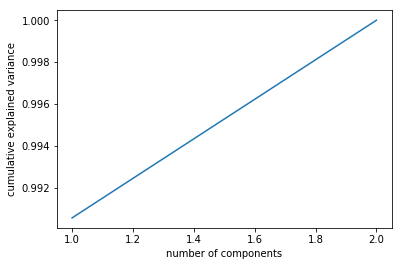

In [4]:
# visualize the relationship between amount of variance explained and number of components
import matplotlib.pyplot as plt
plt.plot(np.array(range(len(compressor.explained_variance_ratio_))) + 1, 
         np.cumsum(compressor.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show(); # two features can already explained much variance